# Homework: Decision Tree
## Phase 2: Classification with scikit-learn
***

## Import Libraries

In [410]:
# complete
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)
from sklearn.model_selection import GridSearchCV

## Load Dataset (CSV file)

In [411]:
dataset = pd.read_csv('Decision_Tree_Dataset.csv', sep = ',', header = 0)
dataset

,Result,Initial payment,Last payment,Credit Score,House Number
0,yes,201,10018,250,3046
1,yes,205,10016,395,3044
2,yes,257,10129,109,3251
3,yes,246,10064,324,3137
4,yes,117,10115,496,3094
...,...,...,...,...,...
995,No,413,14914,523,4683
996,No,359,14423,927,4838
997,No,316,14872,613,4760
998,No,305,14926,897,4572


## Dataset Information

Descriptive Statistics:

- Purpose: Summarize and describe the main characteristics of the dataset.
- Techniques: Calculate mean, median, mode, standard deviation, range, and other summary statistics.

In [412]:
# complete
print(dataset.describe())

       Initial payment  Last payment  Credit Score  House Number
count       1000.00000    1000.00000   1000.000000   1000.000000
mean         294.34300   12465.88400    528.042000   4027.011000
std          115.81539    1440.15617    259.796059    565.164179
min          100.00000   10005.00000    100.000000   3003.000000
25%          195.00000   11201.50000    302.000000   3545.000000
50%          289.50000   12450.00000    516.500000   4041.500000
75%          398.00000   13678.25000    753.500000   4507.000000
max          500.00000   14996.00000    997.000000   5000.000000


- provide a brief overview of the dataset (use info() )
- What is the nature of the data (e.g., text, numerical, images)?
- How many instances and features does the dataset contain?

In [413]:
# complete
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Result           1000 non-null   object
 1   Initial payment  1000 non-null   int64 
 2   Last payment     1000 non-null   int64 
 3   Credit Score     1000 non-null   int64 
 4   House Number     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None


In [414]:
# complete
print(dataset.dtypes)

Result             object
Initial payment     int64
Last payment        int64
Credit Score        int64
House Number        int64
dtype: object


In [415]:
# complete
instancesNum = dataset.shape[0]
featuresNum = dataset.shape[1]
print(f"Number of instances is {instancesNum}. & Number of features is {featuresNum}.")

Number of instances is 1000. & Number of features is 5.


- Check for missing values

Result             0
Initial payment    0
Last payment       0
Credit Score       0
House Number       0
dtype: int64


<Axes: title={'center': 'Checking for null values'}>

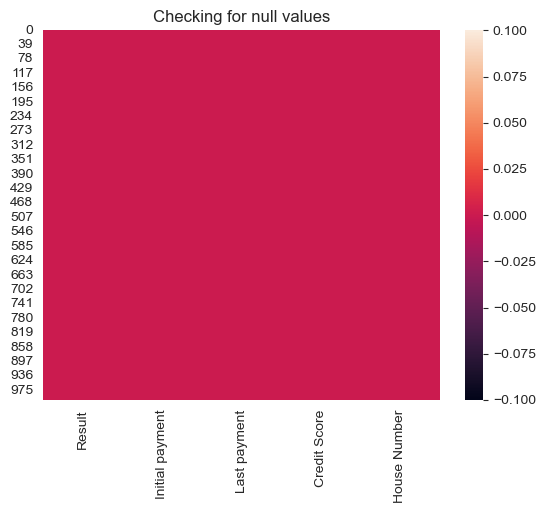

In [416]:
# complete
print(dataset.isnull().sum())
plt.title("Checking for null values")
sns.heatmap(dataset.isnull())

## Visualization

(array([479., 521.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

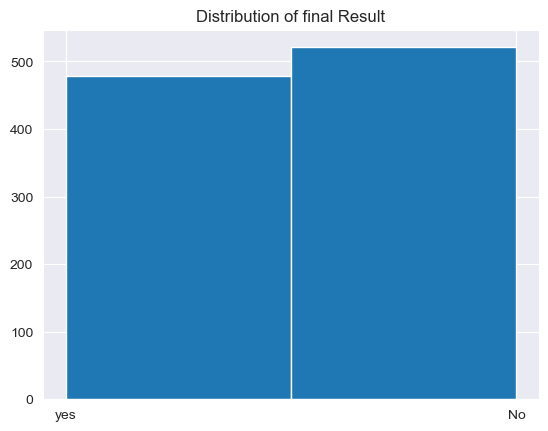

In [417]:
# complete(Extra Point)
# plot a histogram which shows the Distribution of final Result
plt.title("Distribution of final Result")
plt.hist(dataset['Result'], bins = 2)

Text(0.5, 0, 'House Number')

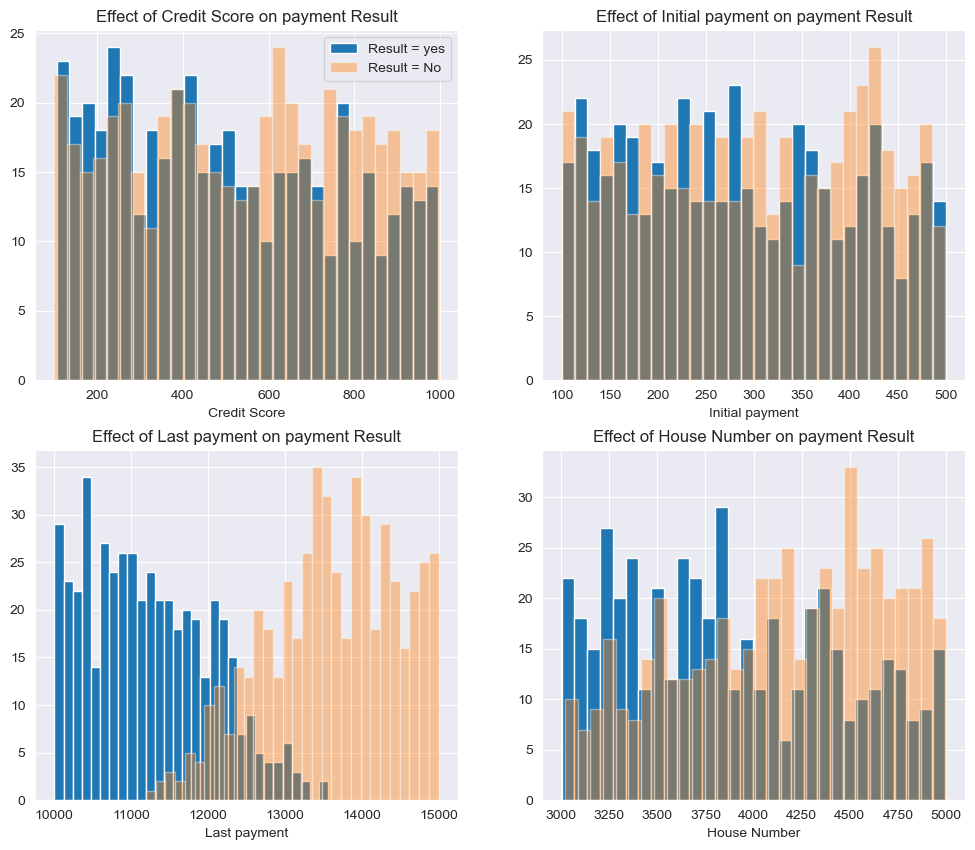

In [418]:
# plot histograms which show the Effect of each feature on payment Result
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
plt.title("Effect of Credit Score on payment Result")
plt.hist(dataset['Credit Score'].loc[dataset['Result']=='yes'], bins=30, label='Result = yes')
plt.hist(dataset['Credit Score'].loc[dataset['Result']=='No'], alpha = 0.4, bins=30, label='Result = No')
plt.legend()
plt.xlabel('Credit Score')

plt.subplot(2, 2, 2)
plt.title("Effect of Initial payment on payment Result")
plt.hist(dataset['Initial payment'].loc[dataset['Result']=='yes'], bins=30, label='Result = yes')
plt.hist(dataset['Initial payment'].loc[dataset['Result']=='No'], alpha = 0.4, bins=30, label='Result = No')
plt.xlabel('Initial payment')

plt.subplot(2, 2, 3)
plt.title("Effect of Last payment on payment Result")
plt.hist(dataset['Last payment'].loc[dataset['Result']=='yes'], bins=30, label='Result = yes')
plt.hist(dataset['Last payment'].loc[dataset['Result']=='No'], alpha = 0.4, bins=30, label='Result = No')
plt.xlabel('Last payment')

plt.subplot(2, 2, 4)
plt.title("Effect of House Number on payment Result")
plt.hist(dataset['House Number'].loc[dataset['Result']=='yes'], bins=30, label='Result = yes')
plt.hist(dataset['House Number'].loc[dataset['Result']=='No'], alpha = 0.4, bins=30, label='Result = No')
plt.xlabel('House Number')

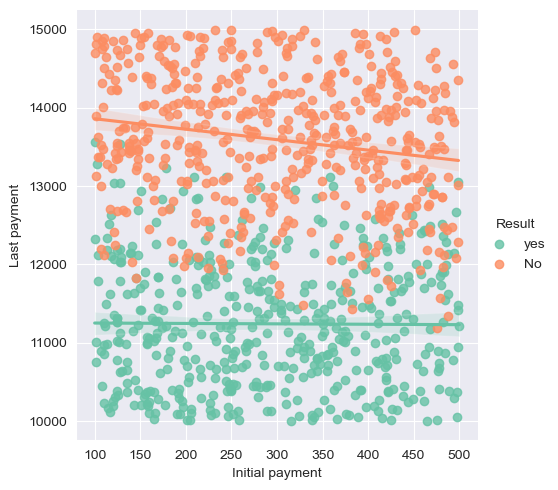

In [419]:
# understanding the relationship between Initial payment and Last payment
sns.lmplot(data=dataset, x='Initial payment', y='Last payment', hue='Result', palette='Set2')

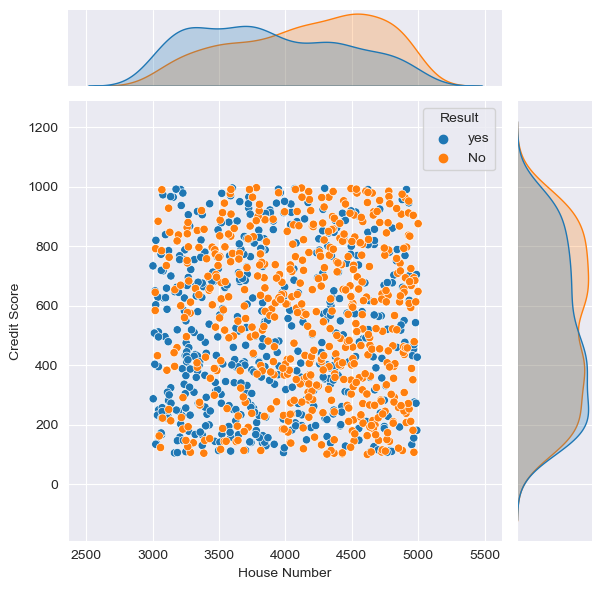

In [420]:
# checking the trend between House Number and Credit Score
sns.jointplot(x='House Number', y='Credit Score', hue = 'Result', data=dataset)

<Axes: xlabel='House Number', ylabel='Last payment'>

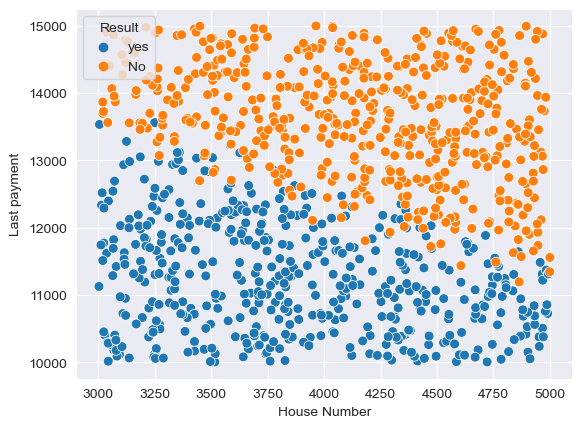

In [421]:
# plot a scatter
sns.scatterplot(x = 'House Number', y = 'Last payment', data = dataset, hue = 'Result', s = 50)

## Model Building

In [422]:
# separating the target variable
# complete
# set features as inPut and label as outPut
inPut = dataset.loc[:, ['Initial payment', 'Last payment', 'Credit Score', 'House Number']] 
outPut = dataset.loc[:, ['Result']]

In [423]:
# splitting dataset in to train and test data
# complete
inPut_train, inPut_test, outPut_train, outPut_test = train_test_split( inPut, outPut, test_size = 0.3, random_state = 100)

In [424]:
#Model
# complete
DT = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
DT.fit(inPut_train, outPut_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

## Prediction

In [425]:
#Make predictions
# complete
outPutTrainPred = DT.predict(inPut_train)
outPutTestPred = DT.predict(inPut_test)
outPutTestPred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

## Evaluate the Model

Assess the model's performance using various metrics such as accuracy, precision, recall, and F1 score

In [426]:
# complete
trainAcc = accuracy_score(outPut_train, outPutTrainPred)
testAcc = accuracy_score(outPut_test, outPutTestPred)
precision = precision_score(outPut_test, outPutTestPred, pos_label = 'yes')
recall = recall_score(outPut_test, outPutTestPred, pos_label = 'yes')
f1score = f1_score(outPut_test, outPutTestPred, pos_label = 'yes')

print(f"Decision tree train/test accuracies: {trainAcc:.3f}/{testAcc:.3f}") 
print(f"Precision = {precision:.3f}")
print(f"Recall = {recall:.3f}")
print(f"F1 Score = {f1score:.3f}")

Decision tree train/test accuracies: 0.959/0.937
Precision = 0.919
Recall = 0.961
F1 Score = 0.939


## Hyperparameter tuning

{'max_depth': 7, 'min_samples_leaf': 1, 'random_state': 42}

New Decision tree train/test accuracies: 0.999/0.963
New Precision = 0.949
New Recall = 0.980
New F1 Score = 0.965


|--- feature_1 <= 12545.00
|   |--- feature_1 <= 11566.50
|   |   |--- feature_3 <= 4996.00
|   |   |   |--- class: yes
|   |   |--- feature_3 >  4996.00
|   |   |   |--- class: No
|   |--- feature_1 >  11566.50
|   |   |--- feature_3 <= 4343.50
|   |   |   |--- feature_3 <= 3847.00
|   |   |   |   |--- class: yes
|   |   |   |--- feature_3 >  3847.00
|   |   |   |   |--- feature_1 <= 12325.00
|   |   |   |   |   |--- feature_2 <= 954.00
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- feature_2 >  954.00
|   |   |   |   |   |   |--- class: No
|   |   |   |   |--- feature_1 >  12325.00
|   |   |   |   |   |--- feature_2 <= 392.50
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- feature_2 >  392.50
|   |   |   |   |   |   |--- class: No
|   |   |--- feature_3 >  4343.50
|   |   | 

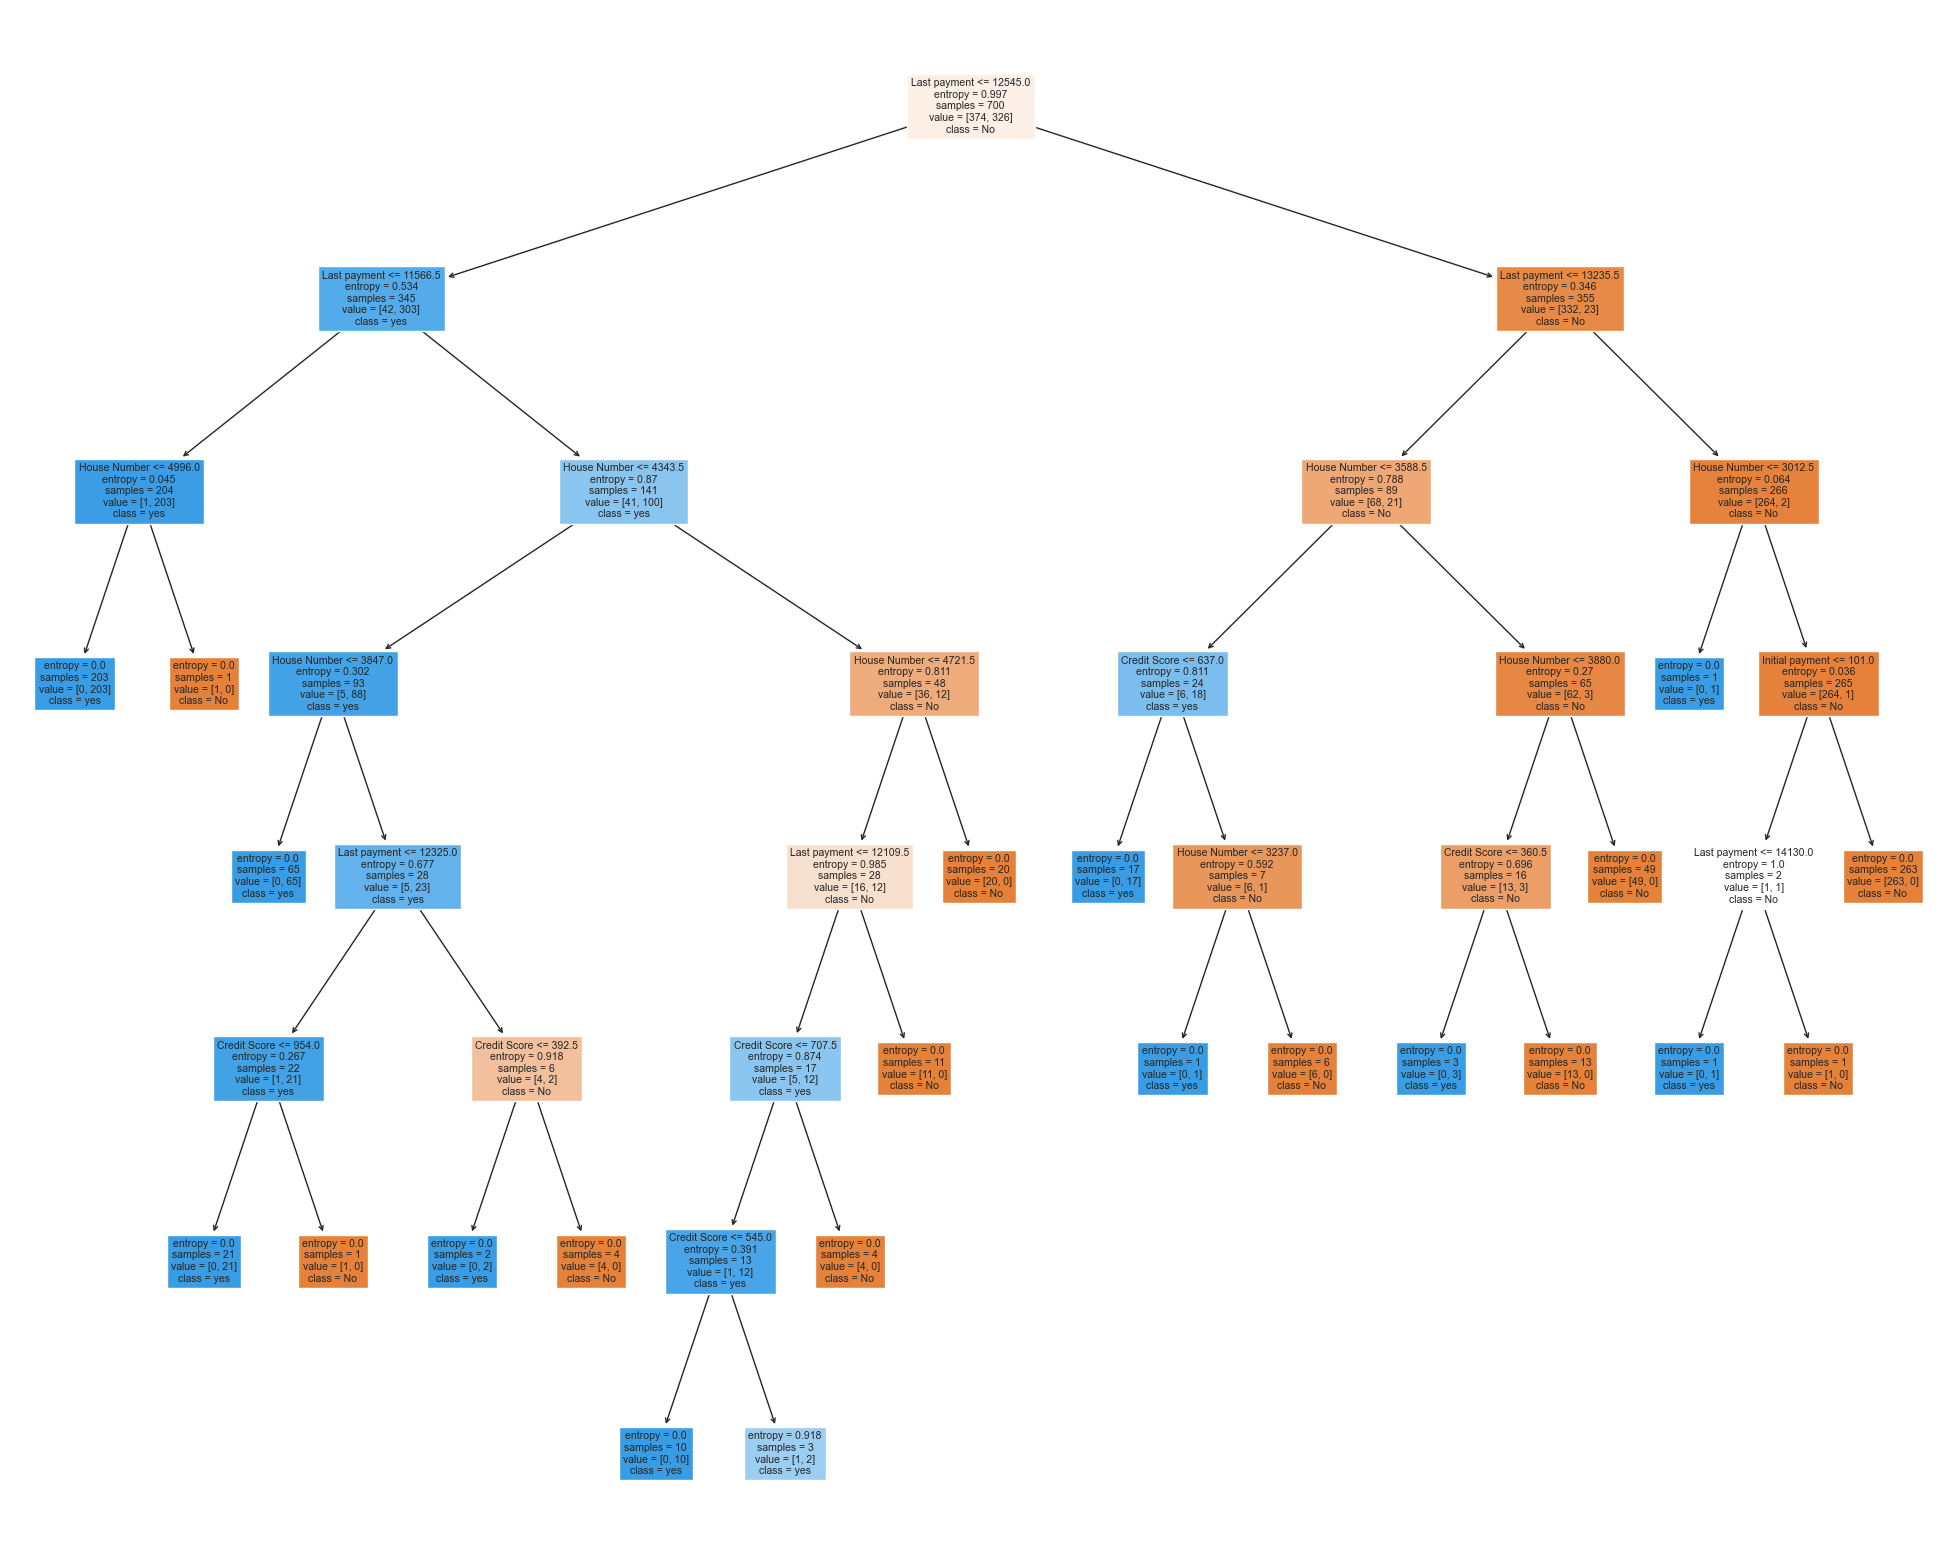

In [432]:
# complete
parameters = {"random_state":[42, 100, 250],
              "max_depth":[1, 2, 3, 4, 5, 7, 10],  
              "min_samples_leaf": [1, 3, 6, 10, 20]}
clf = GridSearchCV(DT, parameters, n_jobs= 1)
clf.fit(inPut_train, outPut_train)
print(clf.best_params_)

# now generate & test another DT with result of tuning
newDT = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth=7, min_samples_leaf=1)
newDT.fit(inPut_train, outPut_train)
outPutTrainPredNEW = newDT.predict(inPut_train)
outPutTestPredNEW = newDT.predict(inPut_test)
trainAccNEW = accuracy_score(outPut_train, outPutTrainPredNEW)
testAccNEW = accuracy_score(outPut_test, outPutTestPredNEW)
precisionNEW = precision_score(outPut_test, outPutTestPredNEW, pos_label = 'yes')
recallNEW = recall_score(outPut_test, outPutTestPredNEW, pos_label = 'yes')
f1scoreNEW = f1_score(outPut_test, outPutTestPredNEW, pos_label = 'yes')

print(f"\nNew Decision tree train/test accuracies: {trainAccNEW:.3f}/{testAccNEW:.3f}") 
print(f"New Precision = {precisionNEW:.3f}")
print(f"New Recall = {recallNEW:.3f}")
print(f"New F1 Score = {f1scoreNEW:.3f}\n\n")

# final new DT
text_representation = tree.export_text(newDT)
print(text_representation)
# plot new DT
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(newDT, feature_names=inPut.columns, class_names = newDT.classes_, filled=True)

## Pruning

In [428]:
# def rep_pruning(tree, validation_data, label):
    # complete
    
    # Code of this section is in Phase1 notebook. 